# <h1><center> Identification of Patients with Congenital Cytomegalovirus (cCMV) Infection through a Deep Neural Network </center></h1>
#### Alexandra Medoro

## Methods

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_addons as tfa

### Prepare Dataset

In [2]:
# Copy datasets from directory
from distutils.dir_util import copy_tree
import os.path
from os import path
if not path.exists('train_features.csv'):
    copy_tree("/users/PAS1669/axm332/Final Project," ".")
    

In [3]:
# Load datasets
test_df = pd.read_csv('./test_features.csv')
train_df = pd.read_csv('./train_features.csv')
train_target_df = pd.read_csv('./train_targets_scored.csv')
test_target_df = pd.read_csv('./test_targets_scored.csv')

In [4]:
train_df.head()

,id,ENSG00000213931,ENSG00000089692,ENSG00000140284,ENSG00000139116,ENSG00000198892,ENSG00000100450,ENSG00000178860,ENSG00000244649,ENSG00000158714,...,ENSG00000270578,ENSG00000154316,ENSG00000229921,ENSG00000276903,ENSG00000281181,ENSG00000281406,ENSG00000102271,ENSG00000167306,ENSG00000224712,ENSG00000261513
0,IMM-NCH-0064,0.030941,0.158352,-0.307270,0.167036,1.102723,0.055752,0.039471,0.0,0.028552,...,0.297574,0.263212,0.0,0.000000,0.015099,0.0,0.56495,-0.321726,1.966528,0.564950
1,IMM-NCH-0065,-0.160223,0.129889,0.026457,-0.459960,1.704259,-0.003795,-0.754545,0.0,0.379468,...,-0.267376,0.831329,0.0,0.000000,0.984871,0.0,0.00000,-0.321726,2.338138,0.000000
2,IMM-NCH-0068,-0.197388,0.026176,-0.026457,-0.068252,0.748686,0.096893,-0.039471,0.0,-0.055011,...,-0.267376,0.011682,0.0,0.508194,-0.041657,0.0,0.00000,0.679699,0.377884,0.715074
3,IMM-NCH-0069,0.397935,-0.882285,-0.219838,-1.192305,-1.296642,-0.439725,0.103651,0.0,0.141040,...,0.343865,0.340333,0.0,0.000000,0.308345,0.0,0.00000,-0.321726,-0.837149,0.611241
4,IMM-NCH-0070,0.395274,0.642351,0.482230,0.319429,-1.709173,0.003795,1.238866,0.0,-1.089654,...,-0.267376,0.377086,0.0,0.000000,-0.549851,0.0,0.00000,0.649012,-0.837149,0.000000


In [5]:
test_df.head()

,id,ENSG00000213931,ENSG00000089692,ENSG00000140284,ENSG00000139116,ENSG00000198892,ENSG00000100450,ENSG00000178860,ENSG00000244649,ENSG00000158714,...,ENSG00000270578,ENSG00000154316,ENSG00000229921,ENSG00000276903,ENSG00000281181,ENSG00000281406,ENSG00000102271,ENSG00000167306,ENSG00000224712,ENSG00000261513
0,IMM-NCH-0064,0.026694,0.146851,-0.272159,0.146957,1.051399,0.045606,0.034317,0.0,0.022077,...,0.255995,0.227651,0.0,0.000000,0.012422,0.0,0.487146,-0.277937,1.765371,0.487146
1,IMM-NCH-0065,-0.139431,0.126179,0.025193,-0.409540,1.645781,-0.005232,-0.651415,0.0,0.351731,...,-0.231151,0.731319,0.0,0.000000,0.864972,0.0,0.000000,-0.277937,2.119820,0.000000
2,IMM-NCH-0068,-0.175556,0.022839,-0.025193,-0.064786,0.708536,0.085649,-0.034317,0.0,-0.054726,...,-0.231151,0.008720,0.0,0.438004,-0.036720,0.0,0.000000,0.588366,0.328119,0.617098
3,IMM-NCH-0069,0.355066,-0.811368,-0.195392,-1.052325,-1.205457,-0.439936,0.090172,0.0,0.125580,...,0.296084,0.295075,0.0,0.000000,0.266863,0.0,0.000000,-0.277937,-0.725332,0.527235
4,IMM-NCH-0070,0.358566,0.613358,0.434800,0.291515,-1.570210,0.005232,1.101947,0.0,-0.978320,...,-0.231151,0.330794,0.0,0.000000,-0.474724,0.0,0.000000,0.564955,-0.725332,0.000000


## Model 1 

Epoch 1/50
4/4 [==============================] - 0s 75ms/step - loss: 2.9617 - accuracy: 0.5833 - val_loss: 0.8964 - val_accuracy: 0.6087
Epoch 2/50
4/4 [==============================] - 0s 19ms/step - loss: 1.2733 - accuracy: 0.6944 - val_loss: 0.6603 - val_accuracy: 0.5652
Epoch 3/50
4/4 [==============================] - 0s 20ms/step - loss: 0.8373 - accuracy: 0.7500 - val_loss: 0.7153 - val_accuracy: 0.5217
Epoch 4/50
4/4 [==============================] - 0s 19ms/step - loss: 0.6149 - accuracy: 0.8611 - val_loss: 1.0031 - val_accuracy: 0.3478
Epoch 5/50
4/4 [==============================] - 0s 19ms/step - loss: 0.6039 - accuracy: 0.8889 - val_loss: 0.8589 - val_accuracy: 0.3478
Epoch 6/50
4/4 [==============================] - 0s 19ms/step - loss: 0.5092 - accuracy: 0.8889 - val_loss: 0.7647 - val_accuracy: 0.5652
Epoch 7/50
4/4 [==============================] - 0s 19ms/step - loss: 0.4745 - accuracy: 0.7500 - val_loss: 0.7497 - val_accuracy: 0.5652
Epoch 8/50
4/4 [===========

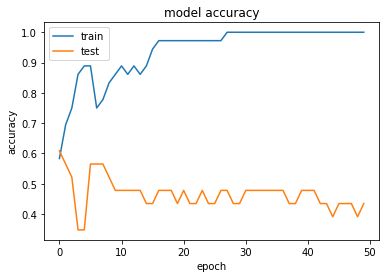

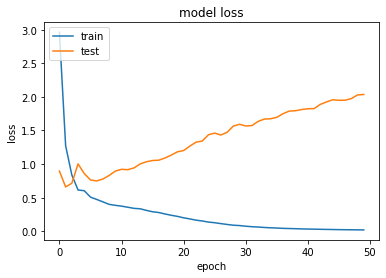

1/1 [==============================] - 0s 973us/step - loss: 2.0353 - accuracy: 0.4348
[[0.9790148  0.03140783]
 [0.98293245 0.01801875]
 [0.9837606  0.02185509]
 [0.94935024 0.04959738]
 [0.99496514 0.00302105]
 [0.962184   0.03836729]
 [0.9958509  0.00790508]
 [0.94597185 0.05825169]
 [0.9442612  0.04838841]
 [0.987288   0.01594235]
 [0.94504386 0.076784  ]
 [0.98711026 0.03368896]
 [0.24706401 0.82213885]
 [0.66721195 0.6420498 ]
 [0.89497215 0.25708777]
 [0.95244575 0.07367215]
 [0.992589   0.00333561]
 [0.9976035  0.0044734 ]
 [0.01348653 0.97494215]
 [0.77239436 0.3292917 ]
 [0.8341258  0.11825338]
 [0.5615947  0.6599204 ]
 [0.90129435 0.13119401]]


In [6]:
# Basic Set-Up
tf.random.set_seed(609)
test_df = pd.read_csv('./test_features.csv')
train_df = pd.read_csv('./train_features.csv')
train_target_df = pd.read_csv('./train_targets_scored.csv')
test_target_df = pd.read_csv('./test_targets_scored.csv')
x_train = train_df.drop(columns="id")
x_test = test_df.drop(columns = "id") 
y_train = train_target_df.drop(columns = "Unnamed: 0")
y_test = test_target_df.drop(columns = "Unnamed: 0")

# Create Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(831))
model.add(tfa.layers.WeightNormalization(tf.keras.layers.Dense(2, activation = "sigmoid")))

# Compile Model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

# Fit Model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50, batch_size = 10)

# Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate Model
model.evaluate(x_test, y_test)

# Make Model Predictions
predictions = model.predict(x_test)
print(predictions)

## Model 2 - Add Hidden Layer

Epoch 1/50
4/4 [==============================] - 0s 67ms/step - loss: 3.5494 - accuracy: 0.6389 - val_loss: 2.9570 - val_accuracy: 0.3913
Epoch 2/50
4/4 [==============================] - 0s 20ms/step - loss: 2.6739 - accuracy: 0.8056 - val_loss: 1.3069 - val_accuracy: 0.3478
Epoch 3/50
4/4 [==============================] - 0s 20ms/step - loss: 0.6482 - accuracy: 0.8056 - val_loss: 1.1491 - val_accuracy: 0.3913
Epoch 4/50
4/4 [==============================] - 0s 21ms/step - loss: 0.4894 - accuracy: 0.8611 - val_loss: 0.9748 - val_accuracy: 0.5217
Epoch 5/50
4/4 [==============================] - 0s 19ms/step - loss: 0.5423 - accuracy: 0.7500 - val_loss: 1.0014 - val_accuracy: 0.5652
Epoch 6/50
4/4 [==============================] - 0s 19ms/step - loss: 0.3895 - accuracy: 0.8611 - val_loss: 1.2684 - val_accuracy: 0.3913
Epoch 7/50
4/4 [==============================] - 0s 19ms/step - loss: 0.4210 - accuracy: 0.8611 - val_loss: 1.5160 - val_accuracy: 0.3478
Epoch 8/50
4/4 [===========

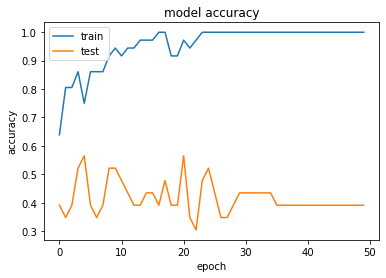

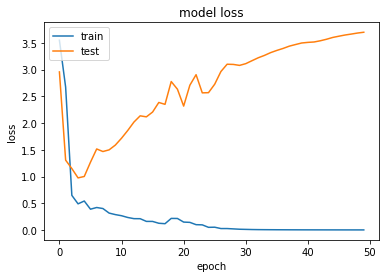

1/1 [==============================] - 0s 1ms/step - loss: 3.6991 - accuracy: 0.3913
[[9.9950576e-01 6.9513236e-04]
 [9.9966097e-01 3.7667021e-04]
 [9.9968457e-01 5.3463352e-04]
 [9.9505508e-01 4.3060784e-03]
 [9.9980038e-01 2.7054854e-04]
 [9.9964237e-01 2.2571185e-04]
 [9.9992537e-01 1.7349880e-04]
 [9.9497992e-01 5.5888332e-03]
 [9.9708074e-01 2.2756953e-03]
 [9.9978739e-01 3.7070786e-04]
 [9.6947801e-01 2.8708449e-02]
 [9.9878627e-01 1.0817858e-03]
 [6.4507939e-02 9.1557479e-01]
 [6.2336501e-02 8.9119822e-01]
 [7.5617433e-01 3.0087879e-01]
 [9.9509263e-01 2.3111613e-03]
 [9.9992275e-01 2.9465798e-05]
 [9.9845207e-01 4.4947788e-03]
 [5.3436845e-03 9.8803598e-01]
 [7.5682914e-01 3.4408426e-01]
 [9.8894835e-01 4.8196507e-03]
 [4.4636133e-01 5.5748141e-01]
 [9.3824339e-01 7.9235718e-02]]


In [7]:
# Basic Set-Up
tf.random.set_seed(609)
test_df = pd.read_csv('./test_features.csv')
train_df = pd.read_csv('./train_features.csv')
train_target_df = pd.read_csv('./train_targets_scored.csv')
test_target_df = pd.read_csv('./test_targets_scored.csv')
x_train = train_df.drop(columns="id")
x_test = test_df.drop(columns = "id") 
y_train = train_target_df.drop(columns = "Unnamed: 0")
y_test = test_target_df.drop(columns = "Unnamed: 0")

# Create Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(831))
model.add(tfa.layers.WeightNormalization(tf.keras.layers.Dense(20, activation = "relu")))
model.add(tfa.layers.WeightNormalization(tf.keras.layers.Dense(2, activation = "sigmoid")))

# Compile Model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

# Fit Model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50, batch_size = 10)

# Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate Model
model.evaluate(x_test, y_test)

# Make Model Predictions
predictions = model.predict(x_test)
print(predictions)

## Final Model- Add Drop Out

Epoch 1/50
4/4 [==============================] - 0s 84ms/step - loss: 1.7417 - accuracy: 0.4722 - val_loss: 0.9214 - val_accuracy: 0.6087
Epoch 2/50
4/4 [==============================] - 0s 14ms/step - loss: 1.2106 - accuracy: 0.7222 - val_loss: 0.6867 - val_accuracy: 0.5652
Epoch 3/50
4/4 [==============================] - 0s 19ms/step - loss: 0.9142 - accuracy: 0.6944 - val_loss: 0.7230 - val_accuracy: 0.5652
Epoch 4/50
4/4 [==============================] - 0s 18ms/step - loss: 0.5741 - accuracy: 0.8056 - val_loss: 0.7783 - val_accuracy: 0.4348
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 0.5843 - accuracy: 0.7500 - val_loss: 0.7727 - val_accuracy: 0.5217
Epoch 6/50
4/4 [==============================] - 0s 15ms/step - loss: 0.5490 - accuracy: 0.7222 - val_loss: 0.8345 - val_accuracy: 0.4348
Epoch 7/50
4/4 [==============================] - 0s 18ms/step - loss: 0.5610 - accuracy: 0.7500 - val_loss: 0.7896 - val_accuracy: 0.5652
Epoch 8/50
4/4 [===========

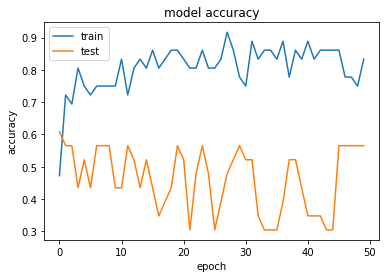

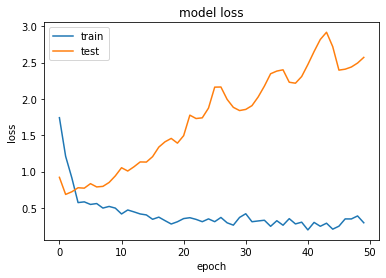

1/1 [==============================] - 0s 1ms/step - loss: 2.5705 - accuracy: 0.5652
[[9.9504083e-01 8.6085452e-03]
 [9.9952245e-01 1.3573838e-03]
 [9.9858785e-01 2.7832796e-03]
 [9.7893858e-01 3.3163223e-02]
 [9.9744236e-01 5.6139375e-03]
 [9.9982017e-01 8.1098295e-04]
 [9.9740785e-01 4.8985532e-03]
 [9.4899470e-01 7.2040722e-02]
 [8.9533973e-01 1.4105117e-01]
 [9.9988687e-01 3.8899356e-04]
 [6.9477403e-01 3.2245800e-01]
 [8.6328989e-01 1.7352811e-01]
 [5.7982105e-01 4.0397513e-01]
 [5.7982105e-01 4.0397513e-01]
 [6.1358297e-01 3.8322422e-01]
 [8.8872504e-01 1.4549772e-01]
 [9.7617006e-01 4.1658103e-02]
 [6.8115234e-01 3.2778218e-01]
 [5.7982105e-01 4.0397513e-01]
 [5.9372383e-01 3.9545143e-01]
 [8.9133418e-01 1.3794331e-01]
 [5.7982105e-01 4.0397513e-01]
 [7.7690309e-01 2.7001667e-01]]


In [8]:
# Basic Set-Up
tf.random.set_seed(609)
test_df = pd.read_csv('./test_features.csv')
train_df = pd.read_csv('./train_features.csv')
train_target_df = pd.read_csv('./train_targets_scored.csv')
test_target_df = pd.read_csv('./test_targets_scored.csv')
x_train = train_df.drop(columns="id")
x_test = test_df.drop(columns = "id") 
y_train = train_target_df.drop(columns = "Unnamed: 0")
y_test = test_target_df.drop(columns = "Unnamed: 0")

# Create Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(831))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tfa.layers.WeightNormalization(tf.keras.layers.Dense(20, activation = "relu")))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tfa.layers.WeightNormalization(tf.keras.layers.Dense(2, activation = "sigmoid")))

# Compile Model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

# Fit Model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50, batch_size = 10)

# Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate Model
model.evaluate(x_test, y_test)

# Make Model Predictions
predictions = model.predict(x_test)
print(predictions)